### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data Explorating and Pre-Processing

In [3]:
df = pd.read_csv("diamonds.csv", index_col = 0)

In [4]:
df.shape

(53940, 10)

The dataset has 53940 rows and 10 columns.

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Handling Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values and our dataset is clean.

#### Handling Duplicated Values

In [9]:
df[df.duplicated(keep = 'first')]

,carat,cut,color,clarity,depth,table,price,x,y,z
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1009,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47970,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49327,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49558,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50080,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [10]:
df.duplicated().sum()

146

There are 146 duplicated values in our dataset.

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

All duplicate values have been removed.

### Statistical Analysis

In [13]:
df.describe(include = 'all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.00000,53794,53794,53794,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21488,11262,13032,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.79778,NaN,NaN,NaN,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,NaN,NaN,NaN,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,NaN,NaN,NaN,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000


In [14]:
def calculate_majority_moments(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['number']).columns
    
    moments_dict = {
        'Mean': dataframe[numerical_columns].mean(),
        'Median': dataframe[numerical_columns].median(),
        'Standard Deviation': dataframe[numerical_columns].std(),
        'Skewness': dataframe[numerical_columns].skew(),
        'Kurtosis': dataframe[numerical_columns].kurtosis()
    }
    
    moments_df = pd.DataFrame(moments_dict)
    moments_df.index.name = 'Column'
    
    return moments_df

# Example usage:
moments_table = calculate_majority_moments(df)
print("Majority Moments:")
display(moments_table)

Majority Moments:


,Mean,Median,Standard Deviation,Skewness,Kurtosis
Column,,,,,
carat,0.797780,0.70,0.473390,1.113651,1.247158
depth,61.748080,61.80,1.429909,-0.114250,5.412989
table,57.458109,57.00,2.233679,0.792227,2.775360
price,3933.065082,2401.00,3988.114460,1.618240,2.178453
x,5.731214,5.70,1.120695,0.379624,-0.629068
y,5.734653,5.71,1.141209,2.445768,91.752305
z,3.538714,3.53,0.705037,1.529023,47.383974


**Skewness:** Skewness measures the asymmetry of the distribution of values in a dataset.
* A skewness value of 0 indicates a perfectly symmetrical distribution, where the mean, median, and mode are all equal.
* If skewness is greater than 0, the distribution is positively skewed, meaning it has a longer tail on the right side of the distribution (right-skewed).
* If skewness is less than 0, the distribution is negatively skewed, meaning it has a longer tail on the left side of the distribution (left-skewed).

**Kurtosis:** Kurtosis measures the shape of the distribution and describes how peaked or flat the distribution is compared to a normal distribution. 
* A kurtosis value of 0 indicates the distribution has the same peak as a normal distribution (mesokurtic).
* If kurtosis is greater than 0, the distribution is more peaked (leptokurtic) and has heavier tails compared to a normal distribution.
* If kurtosis is less than 0, the distribution is flatter (platykurtic) and has lighter tails compared to a normal distribution.

Now, let's interpret the output for a few columns with respect to Skewness and Kurtosis:

**carat:**
* Skewness: 1.113651 (Positive skewness)
* Kurtosis: 1.247158 (Platykurtic)
* The data is skewed to the right, meaning there might be a few diamonds with very high carat weights, leading to a long tail on the right side.
* The distribution has lighter tails compared to a normal distribution.

**depth:**
* Skewness: -0.114250 (Slight negative skewness)
* Kurtosis: 5.412989 (Leptokurtic)
* The data is slightly skewed to the left, indicating a slightly longer left tail compared to the right.
* The distribution has heavier tails and a sharper peak compared to a normal distribution.

**price:**
* Skewness: 1.618240 (Positive skewness)
* Kurtosis: 2.178453 (Mesokurtic)
* The data is skewed to the right, suggesting that there might be a few diamonds with very high prices, leading to a long tail on the right side.
* The distribution has tails and a peak similar to that of a normal distribution.

### Exploratory Data Analysis and Visualization

#### Distribution of Columns

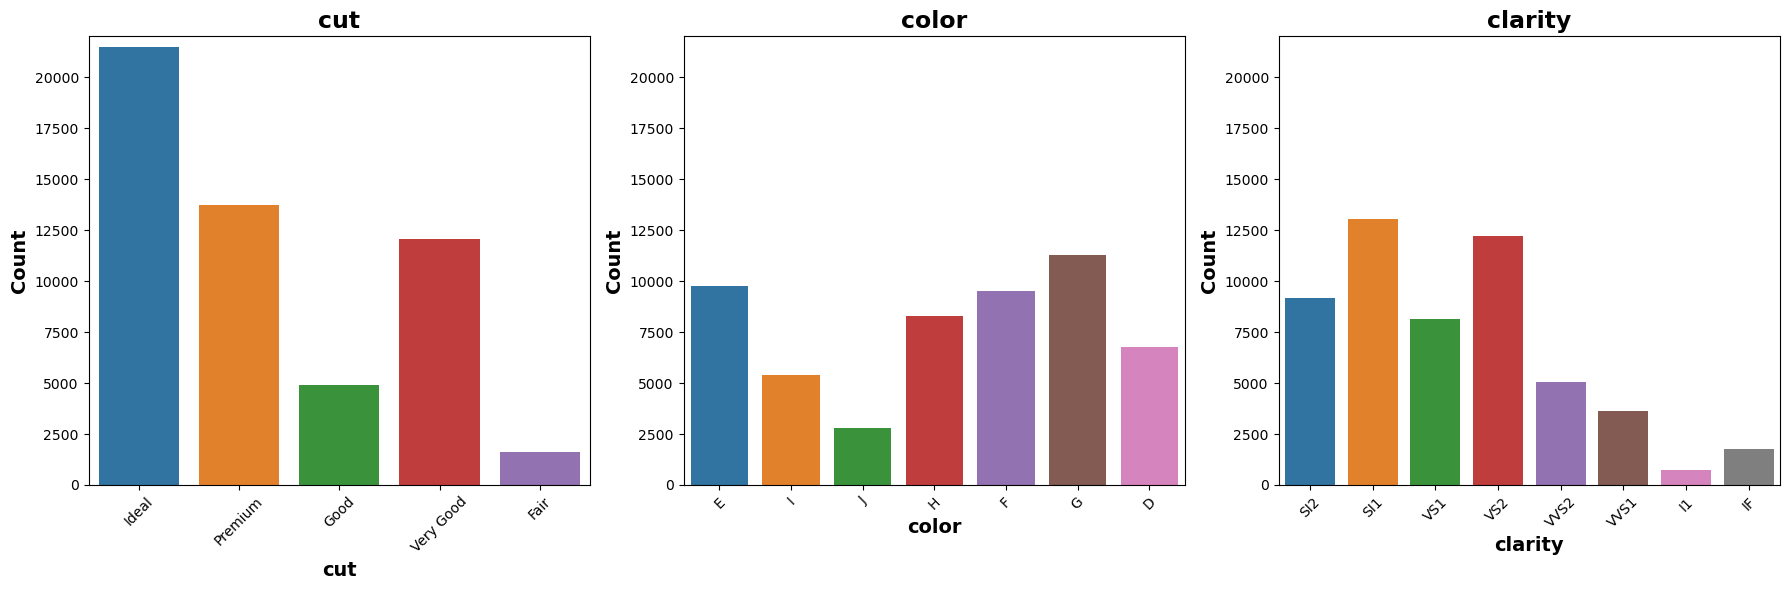

In [15]:
def plot_categorical_data(dataset):
    categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

    num_plots = len(categorical_columns)
    num_cols = 3  # Number of plots per row
    num_rows = (num_plots - 1) // num_cols + 1  # calculate the number of rows needed

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6*num_rows))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        ax = axes[i]
        sns.countplot(data = dataset, x = column, ax = ax)
        ax.set_title(f'{column}', fontsize=17, fontweight='bold')
        ax.set_xlabel(column, fontsize=14, fontweight='bold')
        ax.set_ylabel('Count', fontsize=14, fontweight='bold')
        ax.set_ylim([0, 22000])
        ax.tick_params(axis='x', rotation=45)
        
    # Remove empty subplots
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig("1.Categorical_Plots.png", dpi=300)
    plt.show()

plot_categorical_data(df)

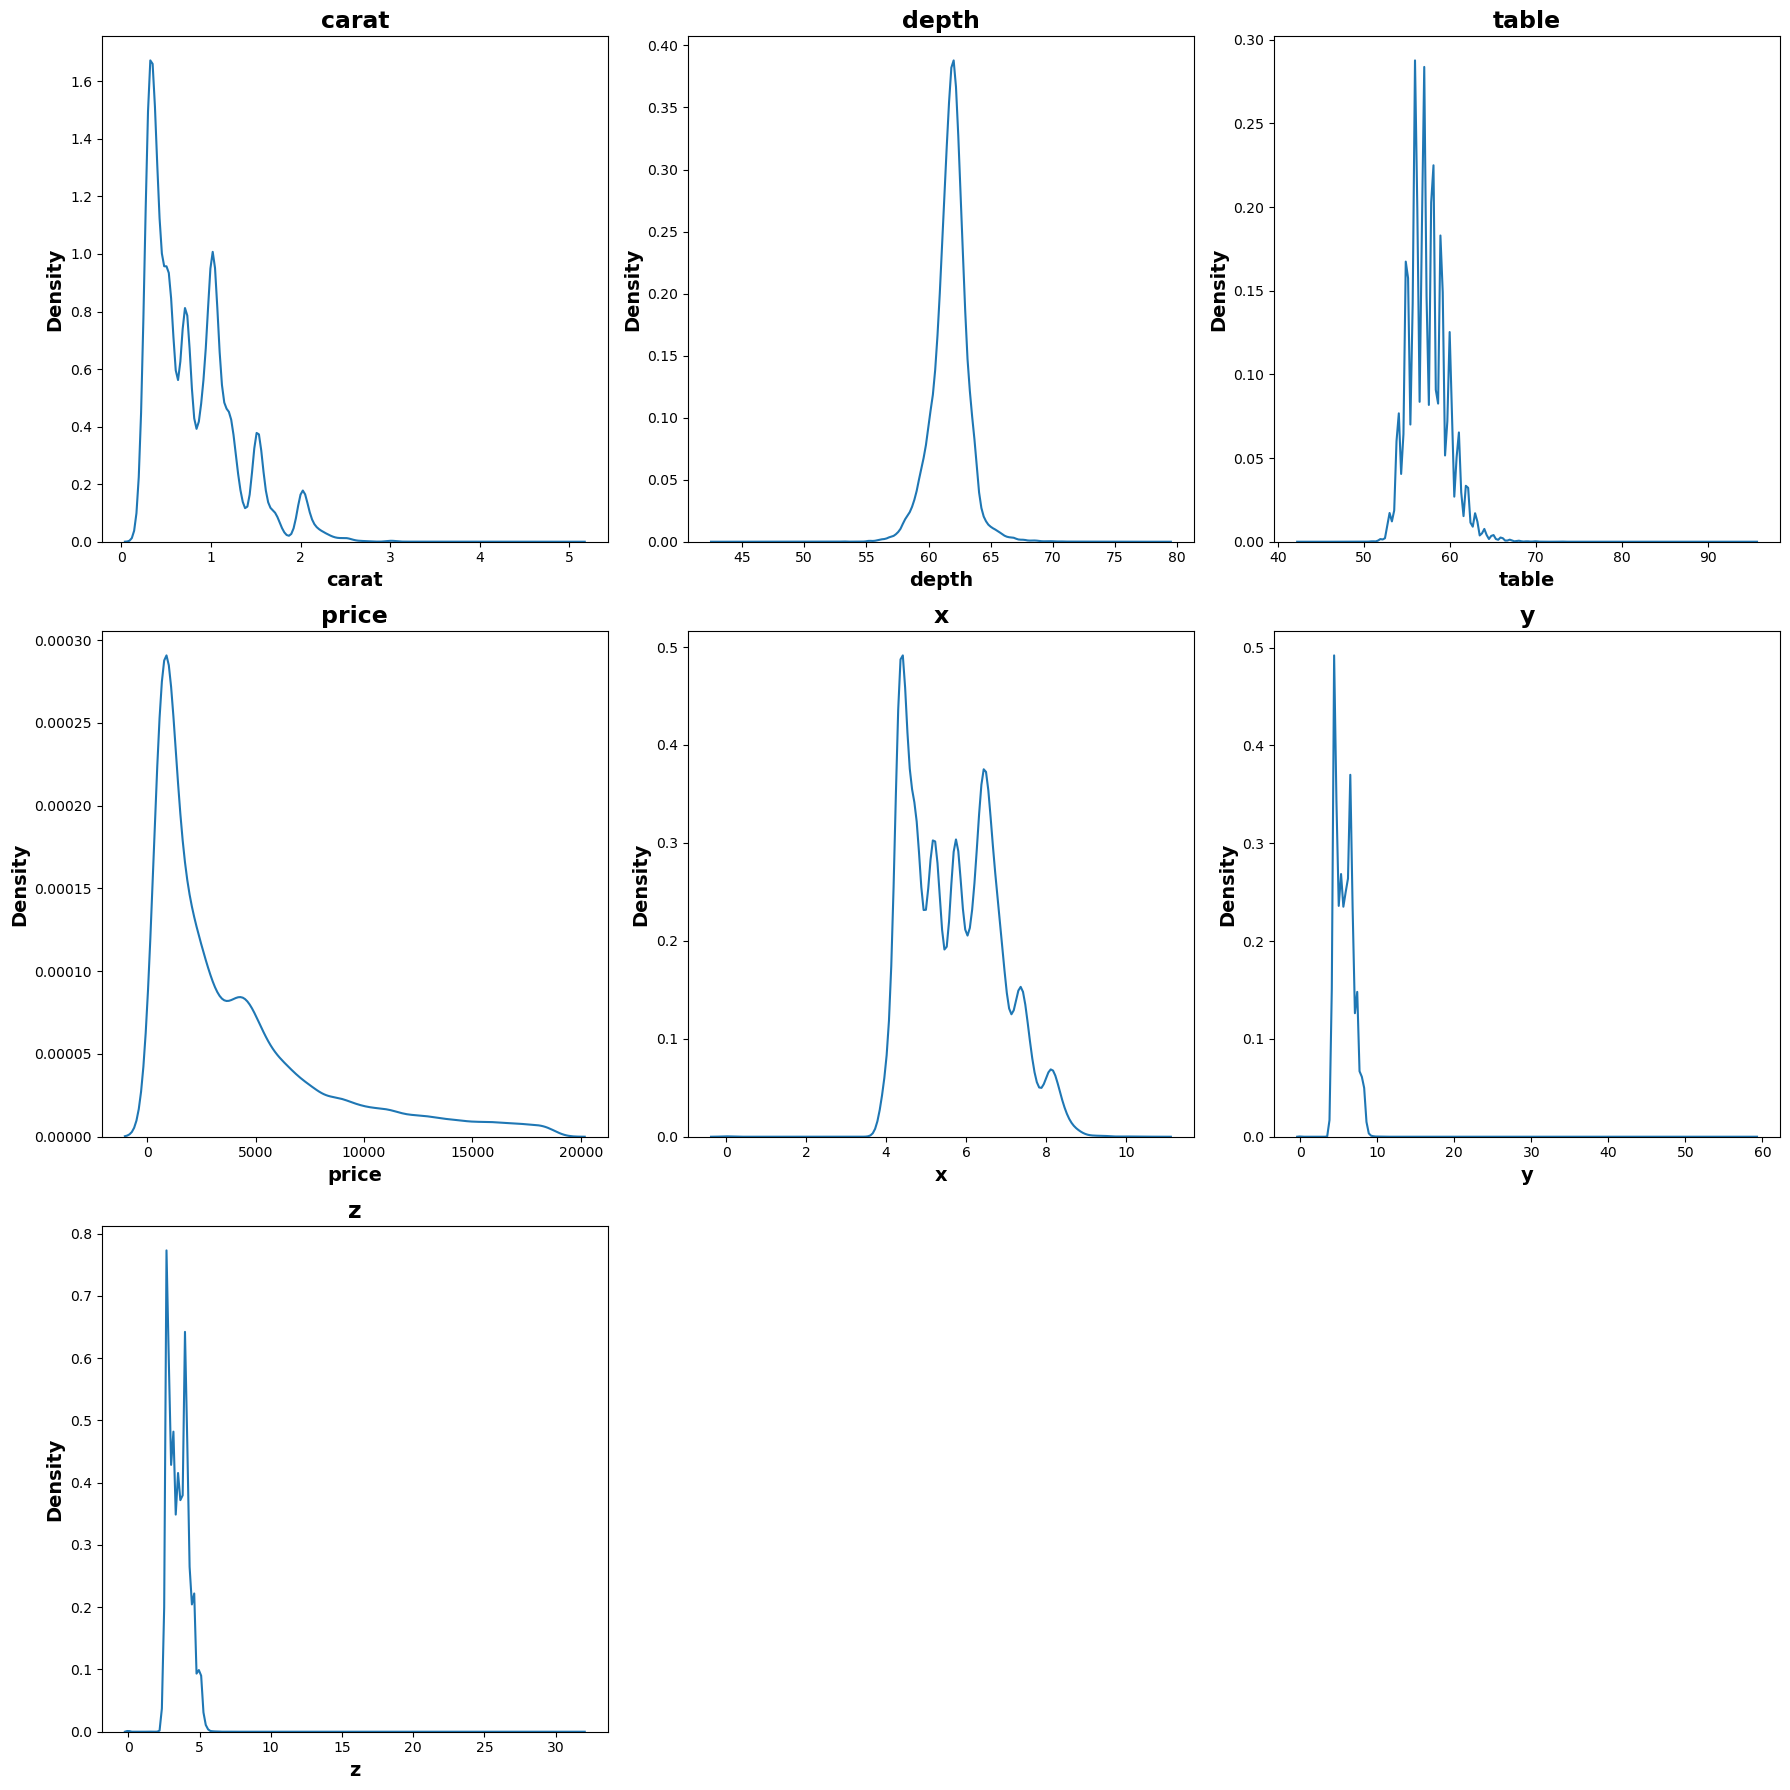

In [16]:
def plot_numerical_data(dataset):
    numerical_columns = dataset.select_dtypes(include=['number']).columns

    num_plots = len(numerical_columns)
    num_cols = 3  # Number of plots per row
    num_rows = (num_plots - 1) // num_cols + 1  # Calculate the number of rows needed

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6*num_rows))
    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        ax = axes[i]
        sns.kdeplot(dataset[column], ax = ax)
        ax.set_title(f'{column}', fontsize=17, fontweight='bold')
        ax.set_xlabel(column, fontsize=14, fontweight='bold')
        ax.set_ylabel('Density', fontsize=14, fontweight='bold')

    # Remove empty subplots
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig("2.Numerical_Plots.png", dpi=300)
    plt.show()

plot_numerical_data(df)

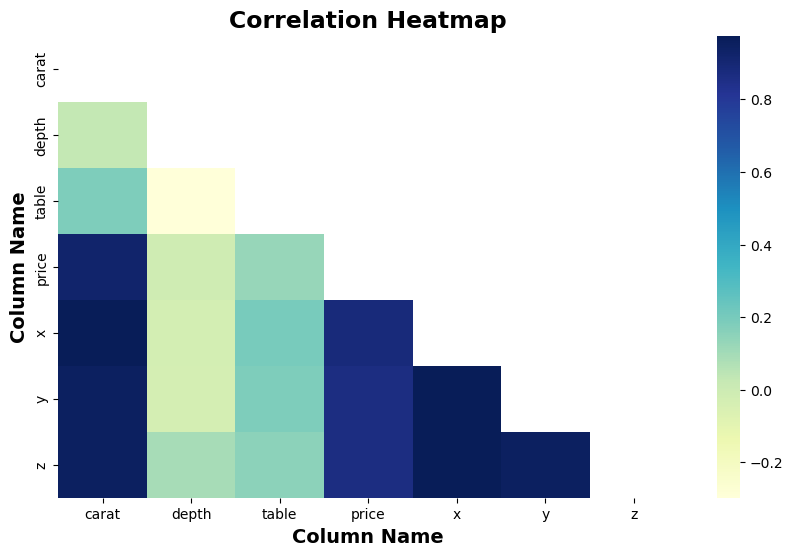

In [18]:
def plot_heatmap(dataset):
    # extract only numerical columns and find correlation using corr()
    numeric_columns = dataset.select_dtypes(include=['float', 'int']).columns
    corr = dataset[numeric_columns].corr()
    
    # avoid redundancy by getting the lower portion of the heatmap only
    matrix = np.triu(corr)
    
    # build the heatmap
    plt.figure(figsize = (10, 6))
    sns.heatmap(corr, annot=True, fmt=".2%", cmap="YlGnBu", mask=matrix)  # fmt=".2%" to display percentages
    plt.title("Correlation Heatmap", fontsize=17, fontweight='bold')
    plt.xlabel("Column Name", fontsize=14, fontweight='bold')
    plt.ylabel("Column Name", fontsize=14, fontweight='bold')
    plt.savefig('3.Correlation_Heatmap.png', dpi=300)
    plt.show()

plot_heatmap(df)

In [20]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
corr = df[numeric_columns].corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


The **correlation coefficient**, ranging from -1 to 1, reflects the strength and direction of the relationship between two variables.
* A value of 1 signifies a perfect positive correlation, indicating that as one variable increases, the other variable also increases.
* A value of -1 indicates a perfect negative correlation, where an increase in one variable corresponds to a decrease in the other.
* A value of 0 denotes no correlation between the variables, suggesting that changes in one variable do not predict changes in the other.

* **Carat weight and price:** There is a very strong positive correlation (0.92) between carat weight and price. This means that larger diamonds tend to be more expensive.
* **Depth and price:** There is a very weak negative correlation (-0.01) between depth and price. Depth refers to the percentage of the diamond's height from its girdle to its culet, relative to its diameter. A negative correlation here means there is no real relationship between these two.
* **Table size and price:** There is a weak positive correlation (0.13) between table size and price. Table size refers to the percentage of the diamond's girdle surface that is flat. A weak positive correlation means there is a slight tendency for diamonds with a larger table to be more expensive.
* **X dimension and price:** There is a strong positive correlation (0.88) between the X dimension (likely width) and price. This dimension is likely related to the carat weight, so it makes sense that there is a positive correlation with price.
* **Y dimension and price:** There is a strong positive correlation (0.87) between the Y dimension (likely length) and price. Similar to the X dimension, this is likely related to carat weight and so shows a positive correlation with price.
* **Z dimension and price:** There is a moderate positive correlation (0.86) between the Z dimension (likely height) and price. Similar to the X and Y dimensions, this is likely related to carat weight and so shows a positive correlation with price.

**Important to note:**
Correlation doesn't imply causation. Just because two factors appear to be correlated doesn't necessarily mean one causes the other.

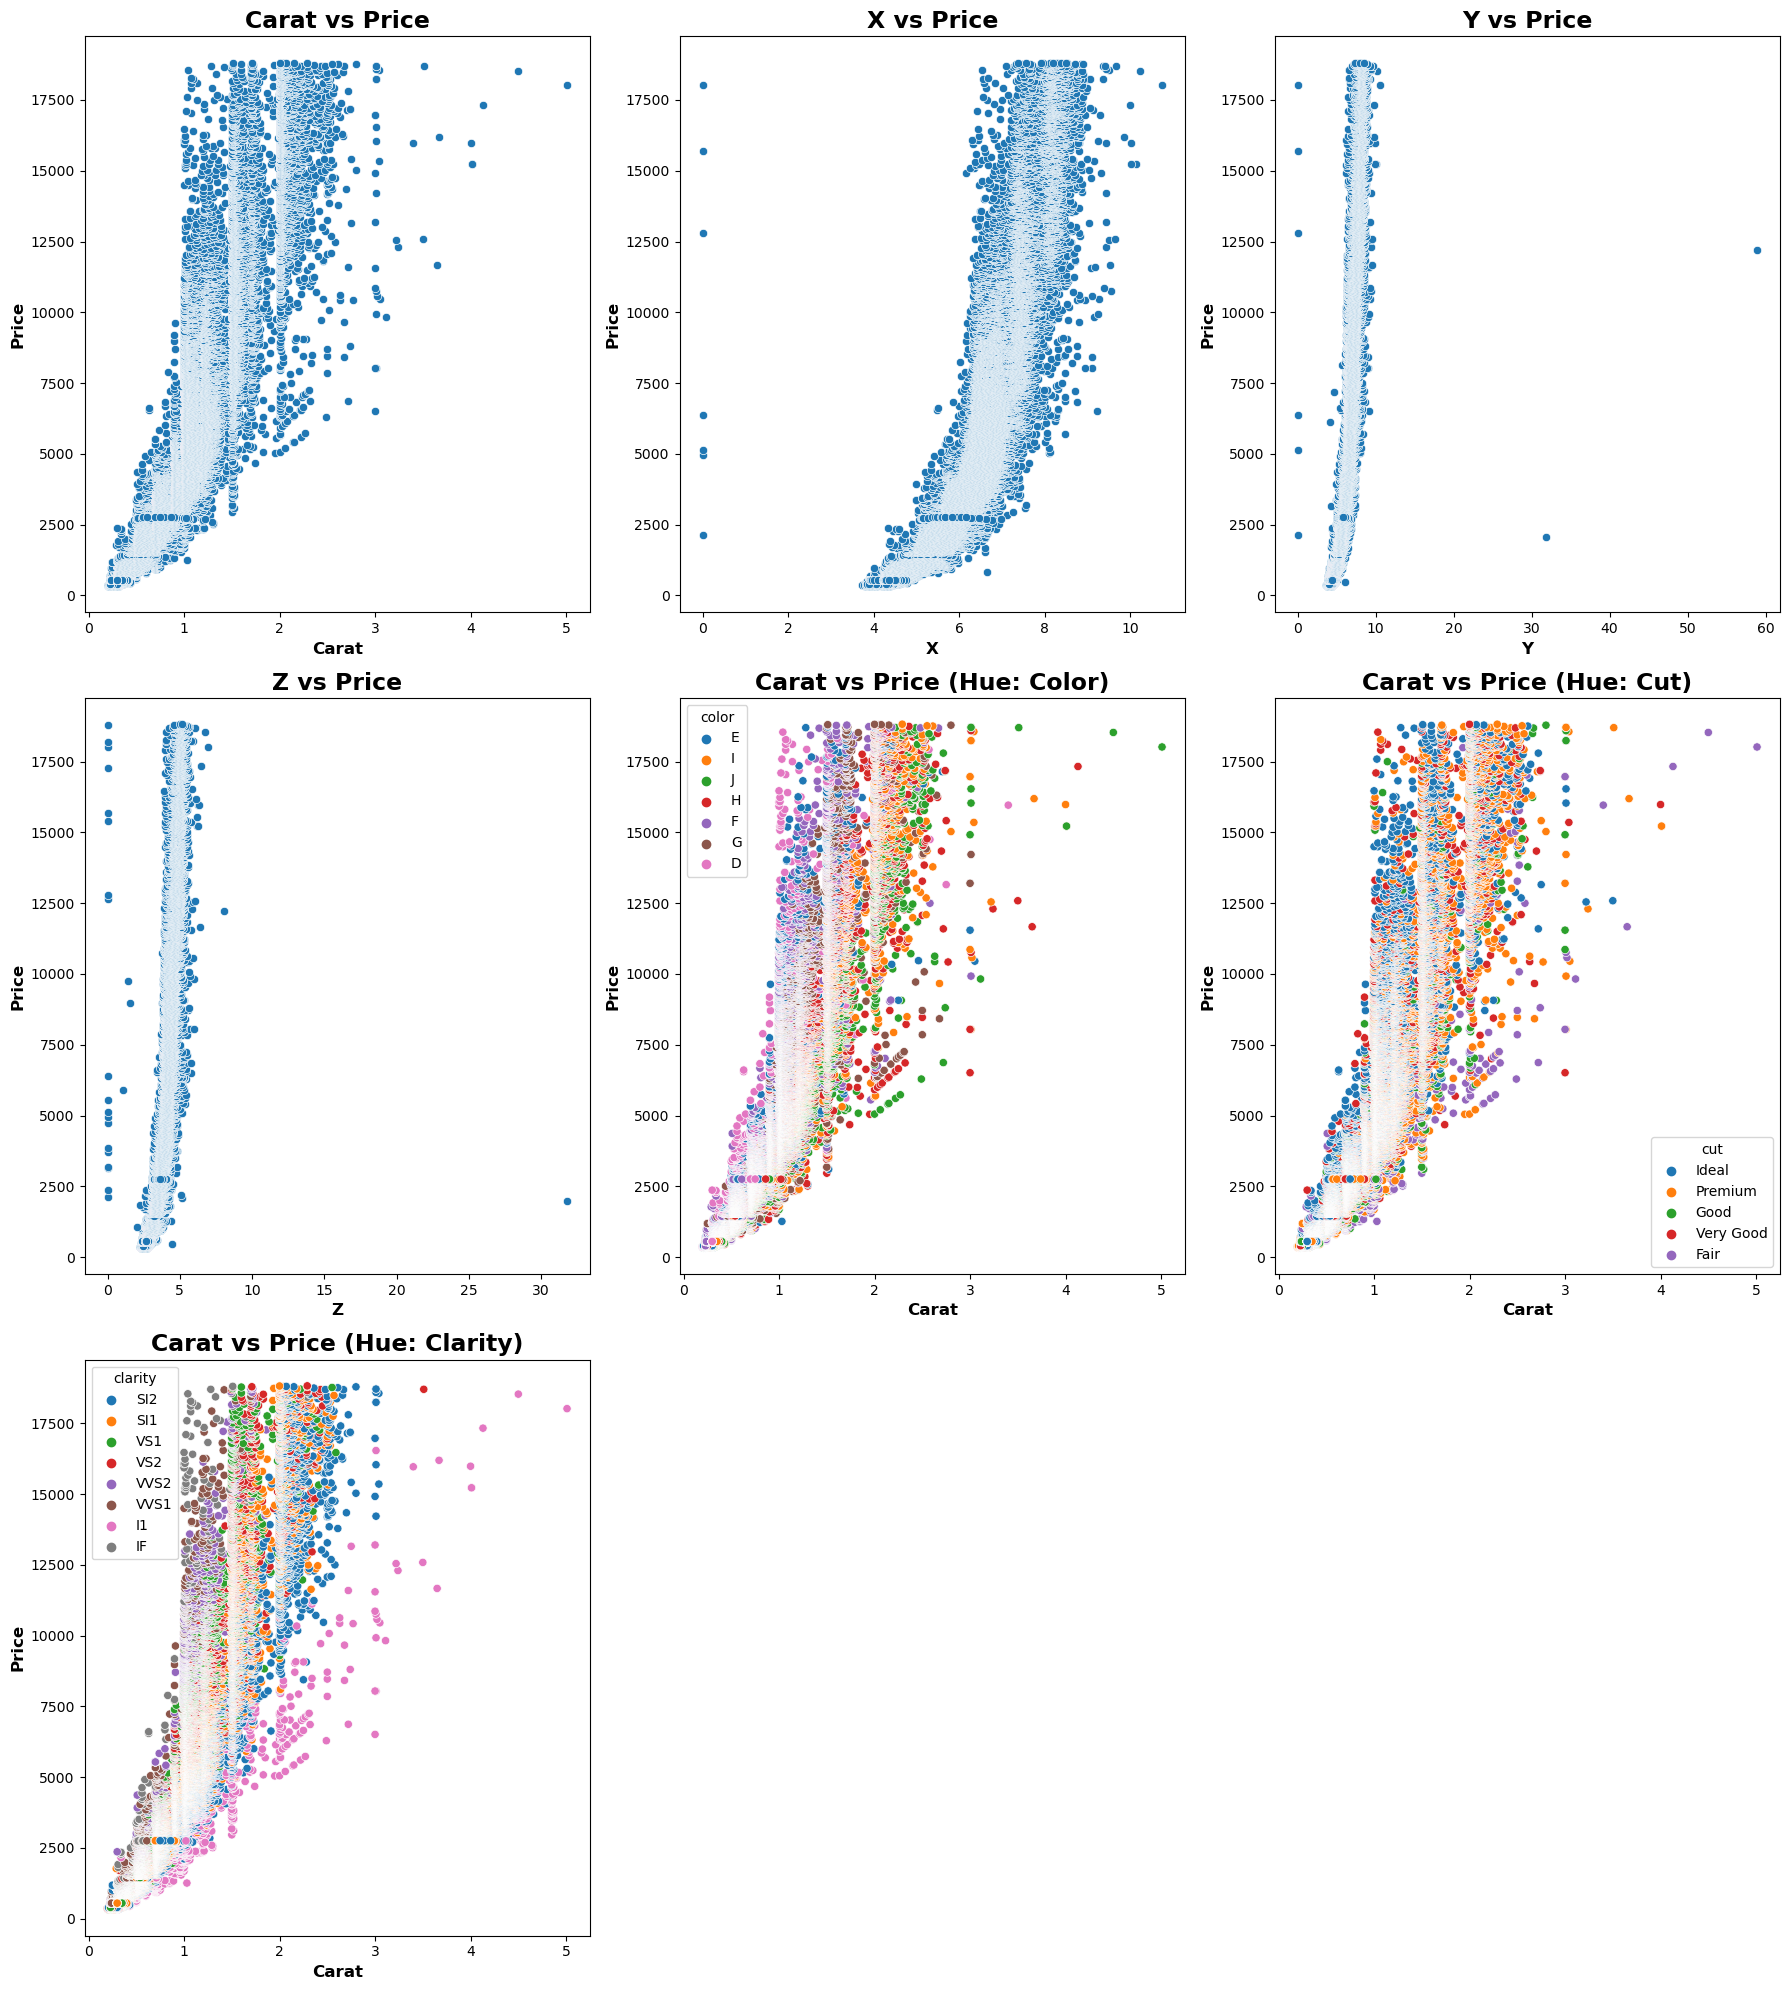

In [21]:
def plot_scatter_plots(diamonds_df):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 20))

    # Plot 1: carat vs price
    sns.scatterplot(data=diamonds_df, x='carat', y='price', ax=axes[0, 0])
    axes[0, 0].set_title('Carat vs Price', fontsize=17, fontweight='bold')
    axes[0, 0].set_xlabel('Carat', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Price', fontsize=12, fontweight='bold')

    # Plot 2: x vs price
    sns.scatterplot(data=diamonds_df, x='x', y='price', ax=axes[0, 1])
    axes[0, 1].set_title('X vs Price', fontsize=17, fontweight='bold')
    axes[0, 1].set_xlabel('X', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Price', fontsize=12, fontweight='bold')

    # Plot 3: y vs price
    sns.scatterplot(data=diamonds_df, x='y', y='price', ax=axes[0, 2])
    axes[0, 2].set_title('Y vs Price', fontsize=17, fontweight='bold')
    axes[0, 2].set_xlabel('Y', fontsize=12, fontweight='bold')
    axes[0, 2].set_ylabel('Price', fontsize=12, fontweight='bold')

    # Plot 4: z vs price
    sns.scatterplot(data=diamonds_df, x='z', y='price', ax=axes[1, 0])
    axes[1, 0].set_title('Z vs Price', fontsize=17, fontweight='bold')
    axes[1, 0].set_xlabel('Z', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Price', fontsize=12, fontweight='bold')

    # Plot 5: carat vs price with hue by color
    sns.scatterplot(data=diamonds_df, x='carat', y='price', hue='color', ax=axes[1, 1])
    axes[1, 1].set_title('Carat vs Price (Hue: Color)', fontsize=17, fontweight='bold')
    axes[1, 1].set_xlabel('Carat', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylabel('Price', fontsize=12, fontweight='bold')

    # Plot 6: carat vs price with hue by cut
    sns.scatterplot(data=diamonds_df, x='carat', y='price', hue='cut', ax=axes[1, 2])
    axes[1, 2].set_title('Carat vs Price (Hue: Cut)', fontsize=17, fontweight='bold')
    axes[1, 2].set_xlabel('Carat', fontsize=12, fontweight='bold')
    axes[1, 2].set_ylabel('Price', fontsize=12, fontweight='bold')

    # Plot 7: carat vs price with hue by clarity
    sns.scatterplot(data=diamonds_df, x='carat', y='price', hue='clarity', ax=axes[2, 0])
    axes[2, 0].set_title('Carat vs Price (Hue: Clarity)', fontsize=17, fontweight='bold')
    axes[2, 0].set_xlabel('Carat', fontsize=12, fontweight='bold')
    axes[2, 0].set_ylabel('Price', fontsize=12, fontweight='bold')

    # Remove unused subplots
    fig.delaxes(axes[2, 1])
    fig.delaxes(axes[2, 2])

    # Adjust layout
    plt.tight_layout()
    plt.savefig("4.Scatter_Plots.png", dpi=300)
    plt.show()

plot_scatter_plots(df)

### Model Training and Evaluation

#### Elbow Method to Select Optimal Number of Clusters

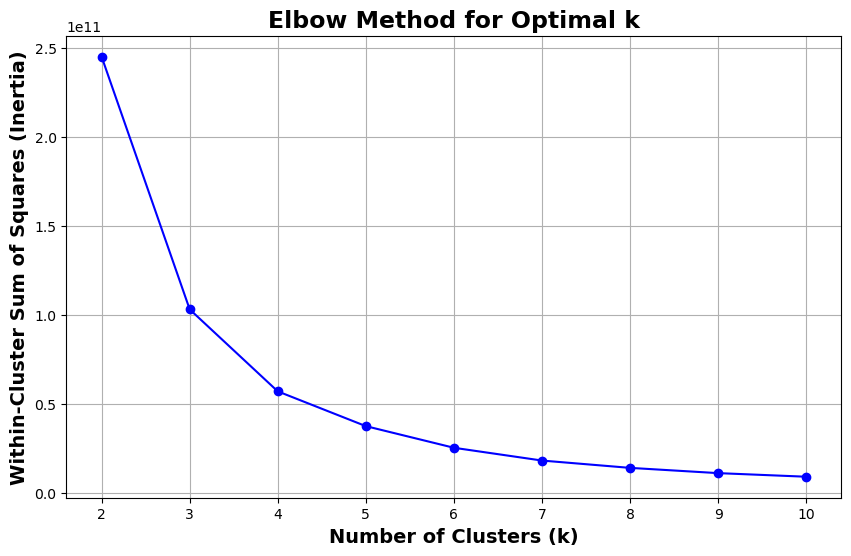

In [24]:
def elbow_method_analysis(dataset):
    numerical_df = dataset.select_dtypes(include=['number']).copy()
    
    # initialize lists to store inertia values
    inertia_values = []
    
    # test different values of k (clusters) 
    k_values = range(2, 11)  
    for k in k_values:
        # create KMeans clustering model
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(numerical_df)
    
        # append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    return k_values, inertia_values

k_values, inertia_values = elbow_method_analysis(df)

# plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('5.Elbow_Method.png', dpi=300)
plt.show()

The optimal number of clusters in this case seems to be 4 as after 4, the line is starting to become straight.

#### K-Means Model Creation

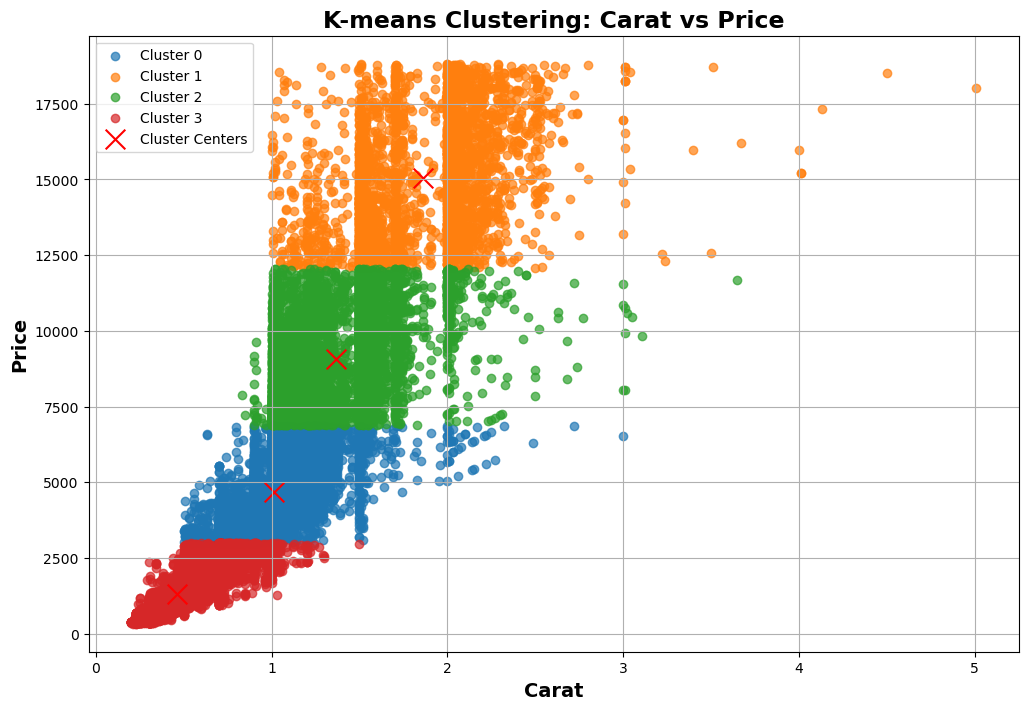

In [25]:
def k_means_modeling(dataset):
    # perform K-means clustering
    kmeans_model = KMeans(n_clusters = 4, random_state=42)  
    dataset['cluster'] = kmeans_model.fit_predict(dataset[['carat', 'price']])

    return kmeans_model, dataset
    
KM_model, df = k_means_modeling(df)

# plot clusters with cluster centers
plt.figure(figsize=(12, 8))

# plot each cluster using a different color
for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['carat'], cluster_data['price'], label=f'Cluster {cluster_label}', alpha=0.7)

# plot cluster centers
cluster_centers = KM_model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: Carat vs Price', fontsize=17, fontweight='bold')
plt.xlabel('Carat', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.savefig('6.K-Means_Clustering_Carat_vs_Price.png', dpi=300)
plt.show()

#### Fitting Predictions

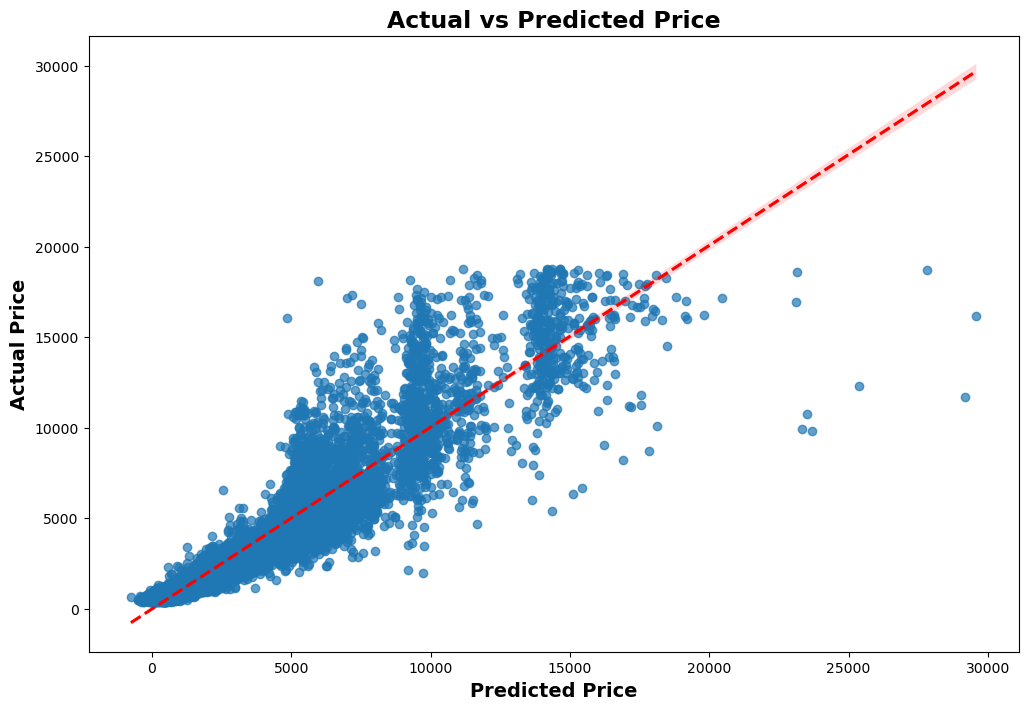

In [45]:
def linear_regression_fitting_predictions(X_train, y_train, X_test):
    # initialize Linear Regression model
    LR_model = LinearRegression()
    
    # fit the model on the training data
    LR_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = LR_model.predict(X_test)

    return LR_model, y_pred


# selecto only numerical features for modeling
numerical_df = df.select_dtypes(include=['number']).copy().drop('cluster', axis = 1)
    
# separate features (X) and target variable (y)
X = numerical_df.drop('price', axis=1)
y = numerical_df['price']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR_model, y_pred = linear_regression_fitting_predictions(X_train, y_train, X_test)

# Plot the predicted vs actual values
plt.figure(figsize=(12, 8))
sns.regplot(x=y_pred, y=y_test, scatter_kws={"alpha":0.7}, line_kws={"color":"red", "linestyle":"--"}, ci=95)
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14, fontweight='bold')
plt.ylabel('Actual Price', fontsize=14, fontweight='bold')
plt.savefig('7.Linear_Regression_on_Price.png', dpi=300)
plt.show()

#### Linear Regression Evaluation

In [42]:
def evaluate_linear_regression_model(LR_model, y_pred):
    # calculate the model's coefficients and intercept
    coefficients = LR_model.coef_
    intercept = LR_model.intercept_
    print(f'Coefficients {coefficients}')
    print(f'Intercept: {intercept}')
    
    # calculate r-squared score (accuracy)
    r2 = r2_score(y_test, y_pred)
    print(f'R2: {r2}')
    
    # calculate root mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'RMSE: {rmse}')
    
    # calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE {mae}')

evaluate_linear_regression_model(LR_model, y_pred)

Coefficients [10675.87729142  -219.36491349  -102.22607512 -1413.45735895
    27.11898465   273.76981292]
Intercept: 21812.01367387095
R2: 0.8584458322102039
RMSE: 1468.869825816917
MAE 878.6600144589027
